# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [51]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import datetime
import scipy.stats as sts

# csv file to Load
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [52]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [53]:
# Check for null values and duplicated rows
nan_rows = len(pyber_df.loc[pyber_df.isnull().any(axis=1)].index)
duplicate_rows = pyber_df.duplicated().sum()
print(f'NaN rows= {nan_rows}\nDuplicate rows= {duplicate_rows}')
# Check DataFrame info
pyber_df.info()

NaN rows= 0
Duplicate rows= 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [54]:
# Get the unique values of the type of city.
area_type = pyber_df["type"].unique()
# Get the number of data points from each city type.
for i in range(len(area_type)):
    print(area_type[i], sum(pyber_df["type"] == area_type[i]))
# type(area_type)

Urban 1625
Suburban 625
Rural 125


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [55]:
# Create the city type DataFrame.
area_type_df = ([])
for i in range(len(area_type)):
    area_type_df.append(pyber_df[pyber_df["type"] == area_type[i]])

In [56]:
#  1. Get the total rides for each city type
total_ride_count = pyber_df["ride_id"].count()
type_ride_count = pyber_df.groupby("type").count()["ride_id"]

# Get the number of rides for each city per city type.
city_type_ride_count = ([])
for i in range(len(area_type)):
    city_type_ride_count.append(area_type_df[i].groupby("city").count()["ride_id"])
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [57]:
# Get fare and driver count for each city type.
type_fare = ([])
type_driver_count = ([])
for i in range(len(area_type)):
    type_fare.append(area_type_df[i]["fare"])
    type_driver_count.append(area_type_df[i]["driver_count"])

In [58]:
# Get average fare for each city type.
total_avg_fare = pyber_df["fare"].mean()
type_avg_fare = pyber_df.groupby("type").mean()["fare"]
city_type_avg_fare = ([])
for i in range(len(area_type)):
    city_type_avg_fare.append(area_type_df[i].groupby("city").mean()["fare"])

In [59]:
# 2. Get the total drivers for each city type
total_drivers = pyber_df["driver_count"].sum()
avg_driver_count = pyber_df["driver_count"].mean()
type_total_drivers = pyber_df.groupby("type").sum()["driver_count"]
type_avg_driver_count = pyber_df.groupby("type").mean()["driver_count"]
city_type_avg_driver_count = ([])
for i in range(len(area_type)):
    city_type_avg_driver_count.append(area_type_df[i].groupby("city").mean()["driver_count"])
    display(area_type[i], type_driver_count[i], city_type_avg_driver_count[i].head())

'Urban'

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

'Suburban'

1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

'Rural'

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

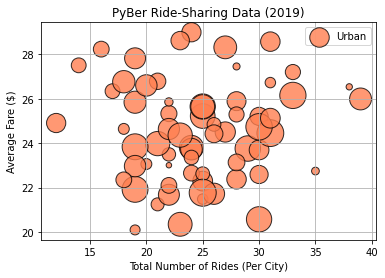

In [60]:
# Build the scatter plots for urban cities.
i = 0  #urban
plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=10*city_type_avg_driver_count[i], 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()
plt.show()

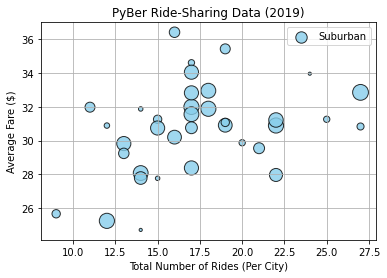

In [61]:
# Build the scatter plots for suburban cities.
i = 1  #suburban
plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=10*city_type_avg_driver_count[i], 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()
plt.show()

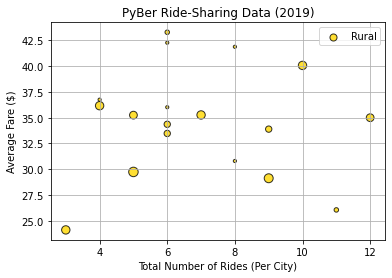

In [62]:
# Build the scatter plots for rural cities.
i = 2  #rural
plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=10*city_type_avg_driver_count[i], 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()
plt.show()

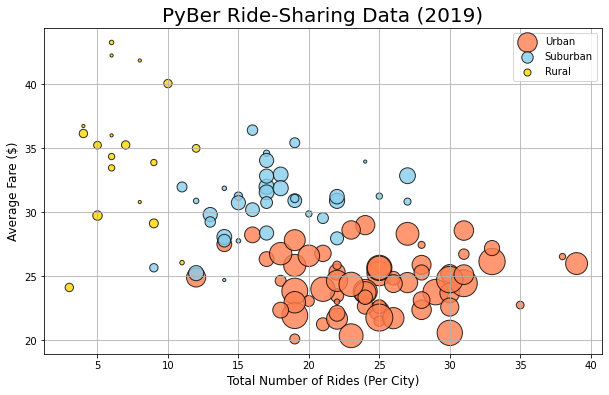

In [63]:
# Build the scatter plots for urban cities.
plt.subplots(figsize=(10, 6))
colors = ["coral", "skyblue", "gold"]
for i in range(len(area_type)):
    plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=10*city_type_avg_driver_count[i], 
            c=colors[i], edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid()
# Add the legend.
plt.legend()
# Show the plot
plt.show()

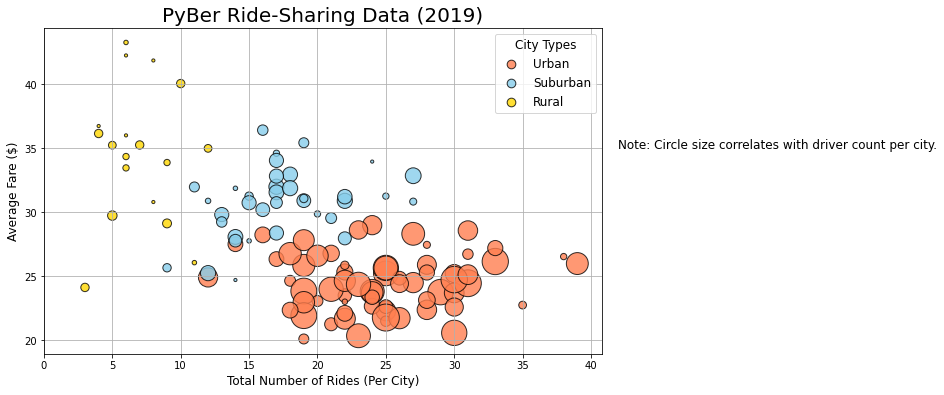

In [64]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
colors = ["coral", "skyblue", "gold"]
for i in range(len(area_type)):
    plt.scatter(city_type_ride_count[i], city_type_avg_fare[i], s=10*city_type_avg_driver_count[i], 
                c=colors[i], edgecolor="black", linewidths=1, alpha=0.8, label=area_type[i])

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.xticks(np.arange(0, 41, step=5.0))
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)
# Save the figure.
plt.savefig('./analysis/Fig1.png', bbox_inches='tight', facecolor='w')
# Show the plot
plt.show()

In [65]:
# Display statistics of each city type
for i in range(len(area_type)):
# Calculate the mean of the ride count for each city type.
    display(area_type[i], round(city_type_ride_count[i].mean(),2), city_type_ride_count[i].describe())

urban_vs_rural_ride_count = round(city_type_ride_count[0].mean()/city_type_ride_count[2].mean(),2)
suburban_vs_rural_ride_count = round(city_type_ride_count[1].mean()/city_type_ride_count[2].mean(),2)
display(urban_vs_rural_ride_count, suburban_vs_rural_ride_count)

'Urban'

24.62

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

'Suburban'

17.36

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

'Rural'

6.94

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

3.55

2.5

In [66]:
# Calculate the median, mode of the ride count for each city type.
for i in range(len(area_type)):
    display(area_type[i], city_type_ride_count[i].median(), city_type_ride_count[i].mode())

'Urban'

24.0

0    22
1    25
Name: ride_id, dtype: int64

'Suburban'

17.0

0    17
Name: ride_id, dtype: int64

'Rural'

6.0

0    6
Name: ride_id, dtype: int64

In [67]:
# Calculate the measures of central tendency for the ride count for each city type.
for i in range(len(area_type)):
    mean_city_type_ride_count = np.mean(city_type_ride_count[i])
    median_city_type_ride_count = np.median(city_type_ride_count[i])
    mode_city_type_ride_count = sts.mode(city_type_ride_count[i])
    print(f"The mean for the ride counts for {area_type[i]} trips is {mean_city_type_ride_count:.2f}.")
    print(f"The median for the ride counts for {area_type[i]} trips is {median_city_type_ride_count}.")
    print(f"The mode for the ride counts for {area_type[i]} trips is {mode_city_type_ride_count}.\n")

The mean for the ride counts for Urban trips is 24.62.
The median for the ride counts for Urban trips is 24.0.
The mode for the ride counts for Urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).

The mean for the ride counts for Suburban trips is 17.36.
The median for the ride counts for Suburban trips is 17.0.
The mode for the ride counts for Suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).

The mean for the ride counts for Rural trips is 6.94.
The median for the ride counts for Rural trips is 6.0.
The mode for the ride counts for Rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).



In [68]:
# Get the fares and driver counts for each city type.
for i in range(len(area_type)):
    area_type_fares = type_fare[i]
    display(area_type[i], area_type_fares.head())
for i in range(len(area_type)):
    area_type_drivers = type_driver_count[i]
    display(area_type[i], area_type_drivers.head())

'Urban'

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

'Suburban'

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

'Rural'

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

'Urban'

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

'Suburban'

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

'Rural'

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [69]:
# Calculate the measures of central tendency for the average fare for each area_type.
for i in range(len(area_type)):
    mean_city_type_fares = np.mean(type_fare[i])
    median_city_type_fares = np.median(type_fare[i])
    mode_city_type_fares = sts.mode(type_fare[i])
    print(f"The mean fare price for {area_type[i]} trips is ${mean_city_type_fares:.2f}.")
    print(f"The median fare price for {area_type[i]} trips is ${median_city_type_fares:.2f}.")
    print(f"The mode fare price for {area_type[i]} trips is {mode_city_type_fares}.\n")

The mean fare price for Urban trips is $24.53.
The median fare price for Urban trips is $24.64.
The mode fare price for Urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for Suburban trips is $30.97.
The median fare price for Suburban trips is $30.75.
The mode fare price for Suburban trips is ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for Rural trips is $34.62.
The median fare price for Rural trips is $37.05.
The mode fare price for Rural trips is ModeResult(mode=array([37.05]), count=array([2])).



In [70]:
# Calculate the measures of central tendency for the driver count for each area_type.
for i in range(len(area_type)):
    city_type_drivers = type_driver_count[i]
    mean_city_type_ride_count = np.mean(city_type_drivers)
    median_city_type_ride_count = np.median(city_type_drivers)
    mode_city_type_ride_count = sts.mode(city_type_drivers)
    print(f"The mean for the driver counts for {area_type[i]} trips is {mean_city_type_ride_count:.2f}.")
    print(f"The median for the driver counts for {area_type[i]} trips is {median_city_type_ride_count}.")
    print(f"The mode for the ride driver for {area_type[i]} trips is {mode_city_type_ride_count}.\n")

The mean for the driver counts for Urban trips is 36.68.
The median for the driver counts for Urban trips is 37.0.
The mode for the ride driver for Urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean for the driver counts for Suburban trips is 13.71.
The median for the driver counts for Suburban trips is 16.0.
The mode for the ride driver for Suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean for the driver counts for Rural trips is 4.30.
The median for the driver counts for Rural trips is 4.0.
The mode for the ride driver for Rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).



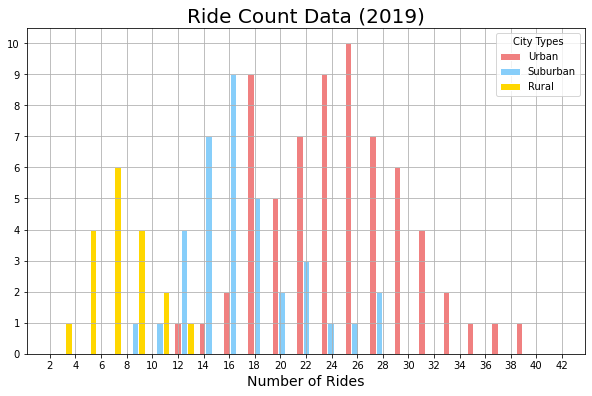

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["lightcoral", "lightskyblue", "gold"]
bins = np.linspace(2,42,22)
hist = ax.hist(city_type_ride_count, bins, align='mid', edgecolor='w', alpha=1, color=colors, label=area_type)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('Number of Rides', fontsize=14)
ax.legend(title='City Types')
ax.grid()
plt.show()

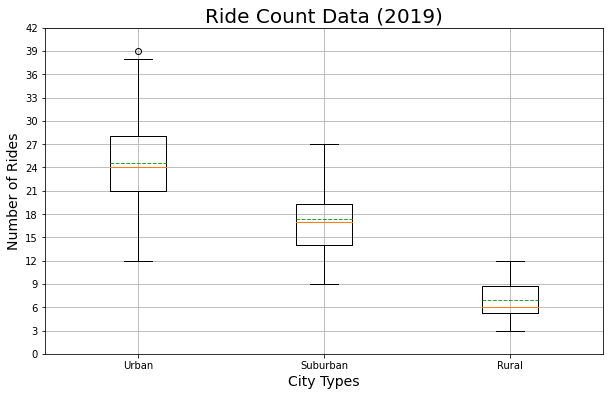

Summary Statistics
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64


In [72]:
# Create a box-and-whisker plot for the ride count data of each city type.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(city_type_ride_count, labels=area_type, meanline=True, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig('./analysis/Fig2.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
print(f'Summary Statistics\n{city_type_ride_count[0].describe()}')

In [73]:
# Get the city that matches 39.
# i = 0  #urban
urban_city_outlier = city_type_ride_count[0][city_type_ride_count[0]==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


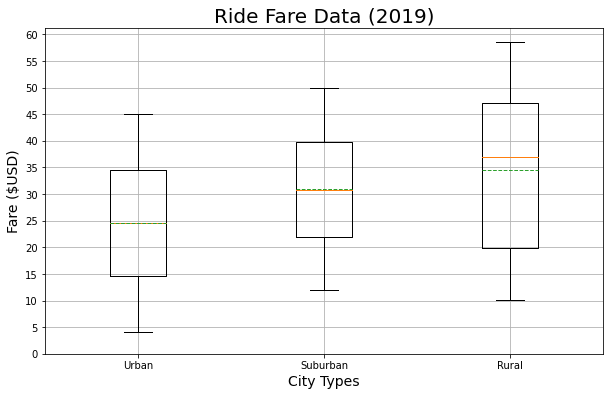

Summary Statistics
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64


In [74]:
# Create a box-and-whisker plot for the fare data of each city type.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(type_fare, labels=area_type, meanline=True, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig('./analysis/Fig3.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
print(f'Summary Statistics\n{type_fare[0].describe()}')

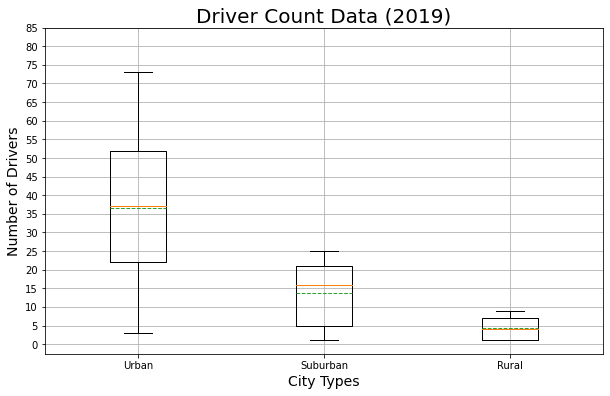

Summary Statistics
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64


In [75]:
# Create a box-and-whisker plot for the driver count data of each city type.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(type_driver_count, labels=area_type, meanline=True, showmeans=True)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_yticks(np.arange(0, 86, step=5.0))
ax.grid()
# Save the figure.
plt.savefig('./analysis/Fig4.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
print(f'Summary Statistics\n{type_driver_count[0].describe()}')

In [76]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_df["fare"].sum()
type_total_fares = pyber_df.groupby("type").sum()["fare"]
# Calculate the percentage of fare for each city type.
type_percents = 100 * type_total_fares / total_fares 
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

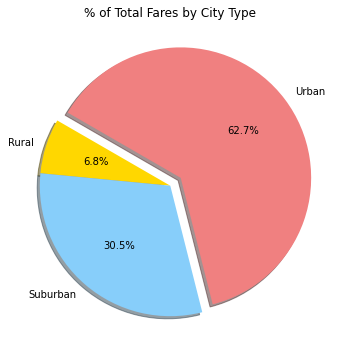

In [77]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
# align x_labels and colors according to city types
x_labels = area_type[::-1]
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(type_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%', shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
# Show Figure
plt.show()

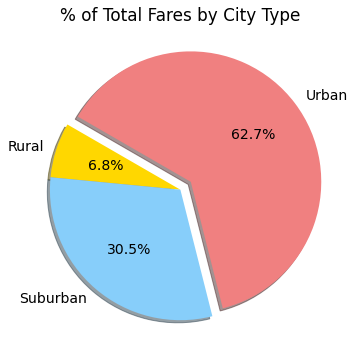

In [78]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
# align x_labels and colors according to city types
x_labels = area_type[::-1]
colors = ["gold", "lightskyblue", "lightcoral"]
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.pie(type_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%', shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('./analysis/Fig5.png', facecolor='w')
# Show Figure
plt.show()

In [79]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * type_ride_count / total_ride_count
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

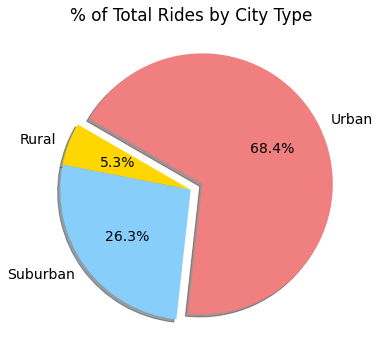

In [80]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
# align x_labels and colors according to city types
x_labels = area_type[::-1]
colors = ["gold", "lightskyblue", "lightcoral"]
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.pie(ride_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%', shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('./analysis/Fig6.png', facecolor='w')
# Show Figure
plt.show()

In [81]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * type_total_drivers / total_drivers
print(driver_percents, type_total_drivers)

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64 type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


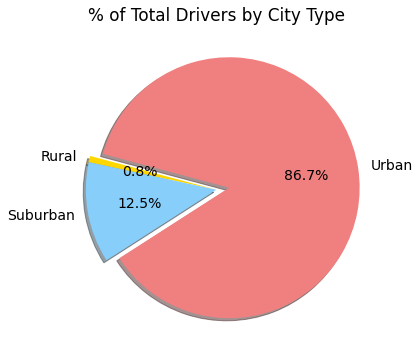

In [82]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
# align x_labels and colors according to city types
x_labels = area_type[::-1]
colors = ["gold", "lightskyblue", "lightcoral"]
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.pie(driver_percents, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%', shadow=True, startangle=165)
plt.title('% of Total Drivers by City Type')
# Show Figure
plt.show()

In [83]:
total_drivers_cdf = city_df["driver_count"].sum()
type_total_drivers_cdf = city_df.groupby("type").sum()["driver_count"]
# Calculate the percentage of drivers for each city type.
driver_percents_cdf = 100 * type_total_drivers_cdf / total_drivers_cdf
print(driver_percents_cdf, type_total_drivers_cdf)

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64 type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


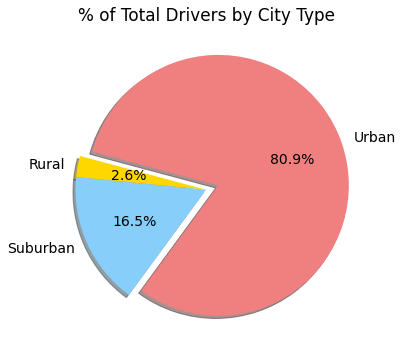

In [84]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
# align x_labels and colors according to city types
x_labels = area_type[::-1]
colors = ["gold", "lightskyblue", "lightcoral"]
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.pie(driver_percents_cdf, labels=x_labels, colors=colors, explode=[0, 0, 0.1], autopct='%.1f%%', shadow=True, startangle=165)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('./analysis/Fig7.png', facecolor='w')
# Show Figure
plt.show()

In [85]:
#  4. Get the average fare per ride for each city type.
# reuse previously calculated total_fares, type_total_fares, total_ride_count, type_ride_count
avg_fare_a_ride = total_fares / total_ride_count
type_avg_fare_a_ride = type_total_fares / type_ride_count
type_avg_fare_a_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [86]:
# 5. Get the average fare per driver for each city type. 
# reuse previously calculated total_fares, type_total_fares, total_drivers_cdf, type_total_drivers_cdf
avg_fare_a_driver = total_fares / total_drivers_cdf
type_avg_fare_a_driver = type_total_fares / type_total_drivers_cdf
type_avg_fare_a_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [87]:
#  6. Create a PyBer summary DataFrame. 
sum_data = {'Total Rides': type_ride_count, 'Total Drivers': type_total_drivers_cdf, 'Total Fares': type_total_fares,
            'Average Fare per Ride': type_avg_fare_a_ride, 'Average Fare per Driver': type_avg_fare_a_driver}
pyber_summary_df = pd.DataFrame(sum_data)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [88]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [89]:
#  8. Format the columns.
pyber_summary_df.iloc[:, :2] = pyber_summary_df.iloc[:, :2].applymap('{:,.0f}'.format)
pyber_summary_df.iloc[:, 2:] = pyber_summary_df.iloc[:, 2:].applymap('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [90]:
# Print the merged DataFrame for reference.
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [91]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_pyber_df = pyber_df.groupby(['type', 'date']).sum()[['fare']]
sum_pyber_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [92]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_pyber_df = sum_pyber_df.reset_index()
sum_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2375 non-null   object 
 1   date    2375 non-null   object 
 2   fare    2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.8+ KB


In [93]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_pyber_pivot = sum_pyber_df.pivot(index='date', columns='type', values='fare')
sum_pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [94]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_pyber_pivot_df429 = sum_pyber_pivot.loc['2019-01-01':'2019-04-29']
# Minor revision of the end-date to align with image in Module 5 Challenge, '2019-01-01':'2019-04-28'.
sum_pyber_pivot_df = sum_pyber_pivot.loc['2019-01-01':'2019-04-28']
display(sum_pyber_pivot_df429.tail(), sum_pyber_pivot_df.tail())

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [95]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
sum_pyber_pivot_df429.index = pd.to_datetime(sum_pyber_pivot_df429.index)
sum_pyber_pivot_df.index = pd.to_datetime(sum_pyber_pivot_df.index)

In [96]:
# 6. Check that the datatype for the index is datetime using df.info()
sum_pyber_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [97]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_pyber_pivot_week429 = sum_pyber_pivot_df429.resample('W').sum()
sum_pyber_pivot_week = sum_pyber_pivot_df.resample('W').sum()
display(sum_pyber_pivot_week429.tail(3), sum_pyber_pivot_week.tail(3), sum_pyber_pivot_week.head(10))

type,Rural,Suburban,Urban
date,,,
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


type,Rural,Suburban,Urban
date,,,
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1169.04,1909.51


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


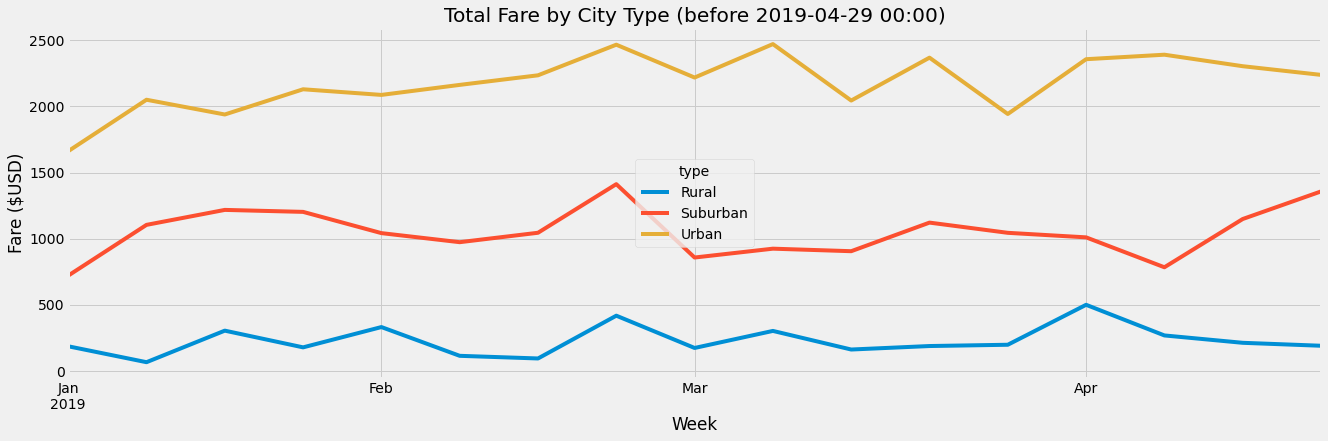

In [98]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

ax = sum_pyber_pivot_week429.plot(figsize=(20,6))
# Add the title, x_axis label, y-axis label.
ax.set_title('Total Fare by City Type (before 2019-04-29 00:00)')
ax.set_xlabel('Week')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 2501, step=500.0))
# Save the figure.
plt.savefig('./analysis/PyBer_fare_summary429.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

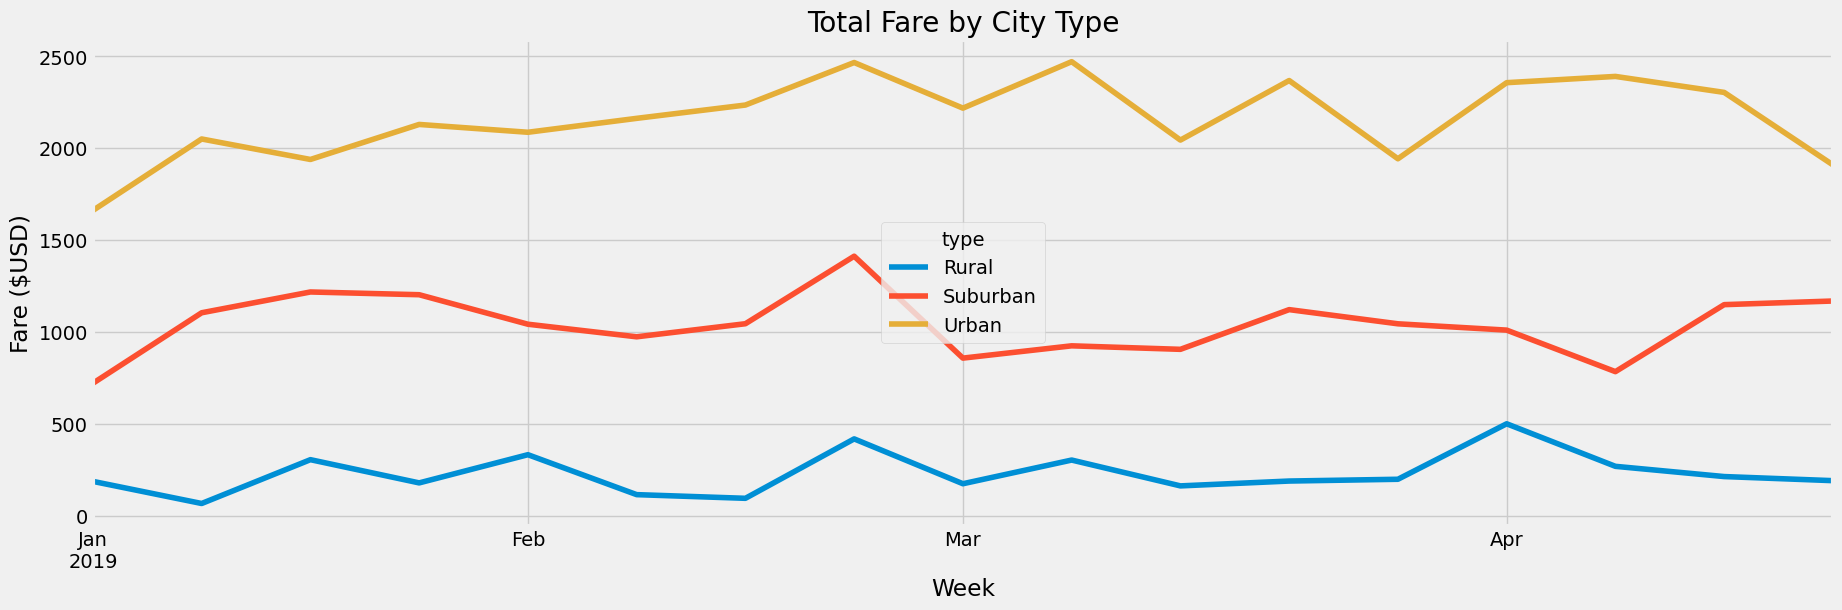

In [100]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Minor revision of the end-date to align with image in Module 5 Challenge, '2019-01-01':'2019-04-28'.
ax = sum_pyber_pivot_week.plot(figsize=(20,6))
# Add the title, x_axis label, y-axis label.
ax.set_title('Total Fare by City Type')
ax.set_xlabel('Week')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 2501, step=500.0))
# Save the figure.
plt.savefig('./analysis/PyBer_fare_summary.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Reset the style from Matplotlib to default.
mpl.rcParams.update(mpl.rcParamsDefault)

In [101]:
# Reimport Matplotlib.
import matplotlib
# Reset the style from Matplotlib to default.
matplotlib.rcParams.update(matplotlib.rcParamsDefault)